<a href="https://colab.research.google.com/github/SeishiroInoue/diveintocode_machine_learning/blob/main/pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 問題1

"""
Home Creditはどのような企業？
"""
Home Creditは、前向きで安全な借入体験を提供することにより、銀行のない人々の金融包摂の拡大に努めている。
この十分なサービスを受けていない人々が確実に融資を受けられるようにするため、Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測している。

"""
このコンペティションでは何を予測する？
"""
電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測している。
クライアントが成功するための元本、満期、返済カレンダーがローンに与えられるようにする。(予測された確率と観測されたターゲットの間のROC曲線の下の領域で評価される。)

"""
それを予測することで企業が得られるメリットは何？
"""
貸し倒れによるリスク回避

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy import stats

In [3]:
df = pd.read_csv("/content/application_train.csv")

In [4]:
# 問題2

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21340 entries, 0 to 21339
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 19.9+ MB


In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,21340.000000,21340.000000,21340.000000,2.134000e+04,2.134000e+04,21340.000000,2.132300e+04,21340.000000,21340.000000,21340.000000,...,21339.000000,21339.000000,21339.000000,21339.000000,18481.000000,18481.000000,18481.000000,18481.000000,18481.000000,18481.000000
mean,112441.991799,0.078679,0.415651,1.737112e+05,5.993482e+05,27105.869775,5.388651e+05,0.020725,-16005.506279,63274.745595,...,0.007732,0.000609,0.000609,0.000469,0.007467,0.007846,0.033007,0.273903,0.264488,1.895136
std,7182.580764,0.269243,0.718731,8.059393e+05,4.018769e+05,14586.794762,3.694925e+05,0.013788,4354.286476,140841.795754,...,0.087595,0.024675,0.024675,0.021643,0.087957,0.116743,0.198188,0.946671,0.615509,1.873586
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106237.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19623.250000,-2782.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,112430.500000,0.000000,0.000000,1.440000e+05,5.147775e+05,24984.000000,4.500000e+05,0.018850,-15730.500000,-1229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,118674.250000,0.000000,1.000000,2.025000e+05,8.100000e+05,34659.000000,6.795000e+05,0.028663,-12351.750000,-289.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,124860.000000,1.000000,8.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,25.000000


In [8]:
df.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<BarContainer object of 2 artists>

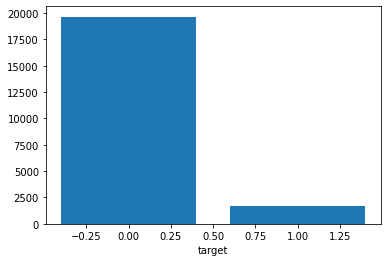

In [10]:
plt.xlabel('target')
plt.bar([0,1], df['TARGET'].value_counts())

In [ ]:
"""
それぞれ結果に対する説明や考察も行ってください。
"""
返済できた人のほうが圧倒的に多い。
ほとんどが欠損値の特徴量がある。

In [ ]:
# 問題3

どんな人が返済できず、返済できなかったのか。
収入に対しての借りた額
性別 　
ローンの種類
収入源
家族の状況
職業 　
車の所有の有無
学歴
年齢 　
など 　

In [11]:
# 問題4

corr_df = df.corr()
corr_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.004667,-0.003233,0.003050,-0.004999,-0.000464,-0.005352,-0.012007,0.001763,0.000890,...,0.003610,0.009607,0.004955,0.006262,-0.000096,-0.002539,-0.002697,0.002039,-0.007166,0.009536
TARGET,0.004667,1.000000,0.034417,0.021384,-0.029590,-0.001275,-0.036187,-0.034141,0.086518,-0.042951,...,-0.003940,-0.000161,-0.000161,-0.006328,0.008285,0.019336,0.011209,-0.016842,0.005734,0.028681
CNT_CHILDREN,-0.003233,0.034417,1.000000,0.009897,0.003961,0.028293,-0.000650,-0.021682,0.331149,-0.239758,...,0.002542,-0.006352,0.004218,0.002541,-0.001190,-0.013674,0.001830,-0.019433,-0.012815,-0.036128
AMT_INCOME_TOTAL,0.003050,0.021384,0.009897,1.000000,0.045780,0.054884,0.045633,0.017816,0.012838,-0.021990,...,-0.000565,-0.000507,-0.000566,-0.000774,0.000674,0.001936,0.000956,0.006805,-0.002432,-0.000995
AMT_CREDIT,-0.004999,-0.029590,0.003961,0.045780,1.000000,0.777308,0.986837,0.099437,-0.068481,-0.066455,...,0.022245,0.019486,0.029165,-0.016171,-0.002437,0.019199,0.016347,0.057614,0.012247,-0.033763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002539,0.019336,-0.013674,0.001936,0.019199,0.015806,0.018530,0.011065,-0.003308,0.006696,...,-0.006059,-0.001640,-0.001783,-0.001399,0.194548,1.000000,0.316236,-0.010633,0.000489,0.009204
AMT_REQ_CREDIT_BUREAU_WEEK,-0.002697,0.011209,0.001830,0.000956,0.016347,0.030374,0.017439,0.011645,-0.004626,-0.011163,...,-0.002803,-0.004064,0.016177,0.009660,0.020007,0.316236,1.000000,-0.020501,-0.018781,0.018649
AMT_REQ_CREDIT_BUREAU_MON,0.002039,-0.016842,-0.019433,0.006805,0.057614,0.033482,0.058419,0.088110,0.005989,-0.035277,...,0.009069,0.002313,0.000947,-0.003273,0.004680,-0.010633,-0.020501,1.000000,-0.014844,-0.008212
AMT_REQ_CREDIT_BUREAU_QRT,-0.007166,0.005734,-0.012815,-0.002432,0.012247,0.004329,0.012341,-0.005047,-0.008783,0.014944,...,-0.009249,0.003931,-0.001453,0.003736,0.007497,0.000489,-0.018781,-0.014844,1.000000,0.090683


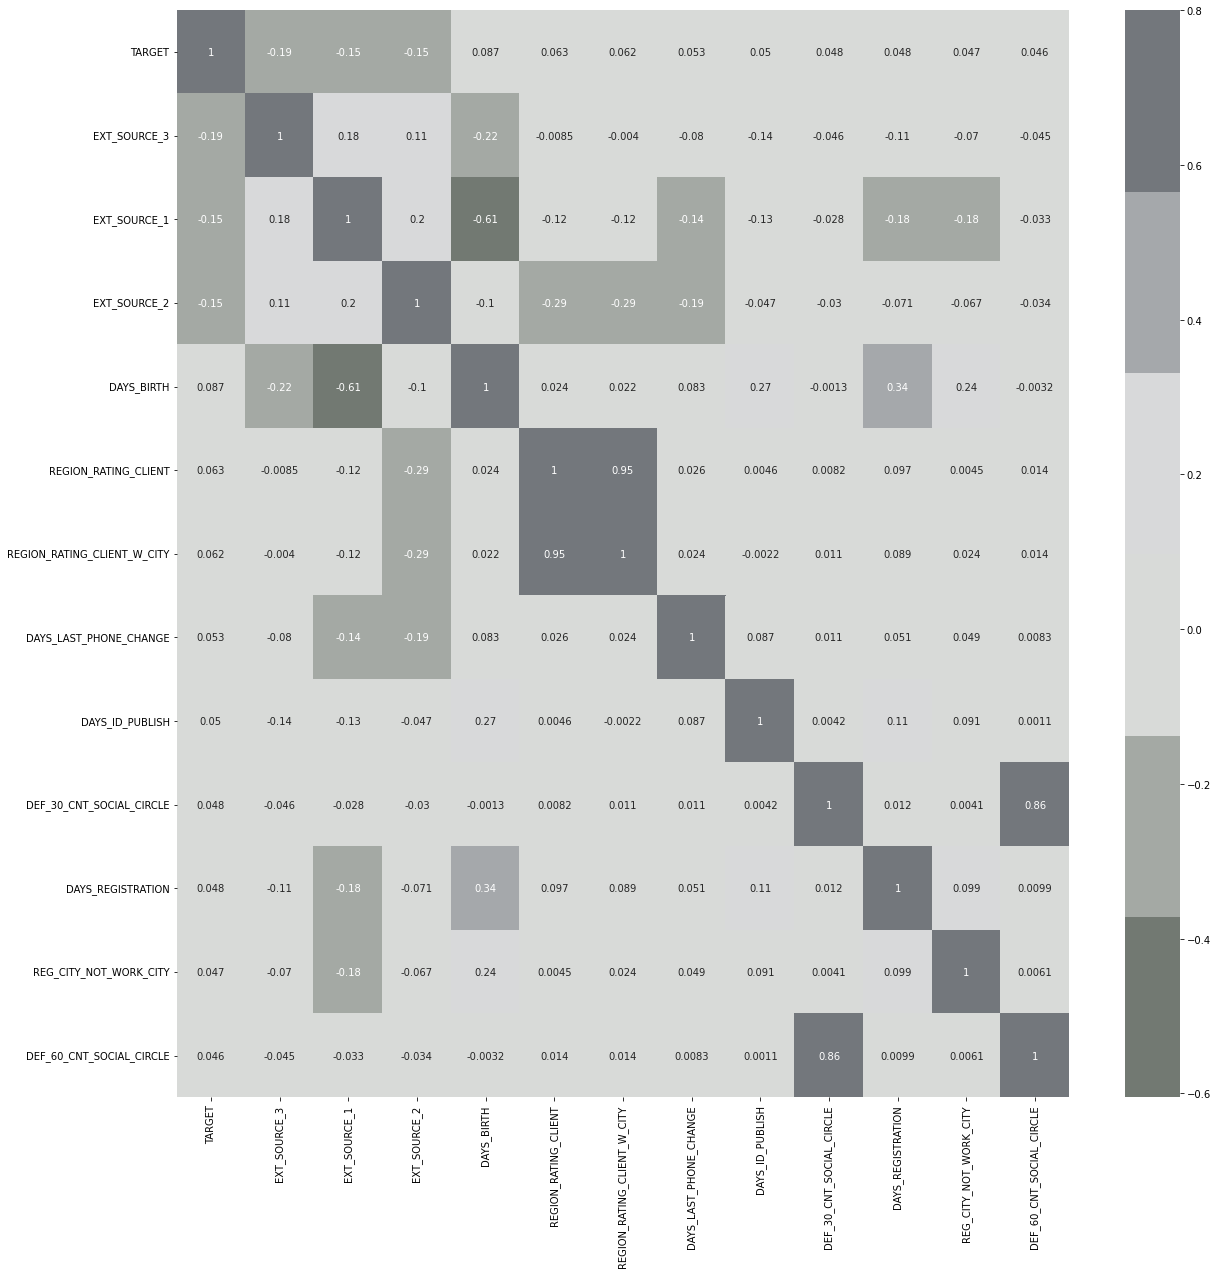

In [14]:
cor = df.corr()['TARGET'].abs().nlargest(13)

top_features = corr_df.index
plt.figure(figsize=(20,20))
pal = sns.diverging_palette(128, 240, 8)
sns.heatmap(df[cor.index].corr(), vmax=0.8, annot=True, cmap=pal)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


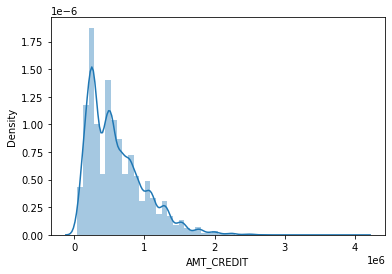

In [15]:
sns.distplot(df["AMT_CREDIT"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


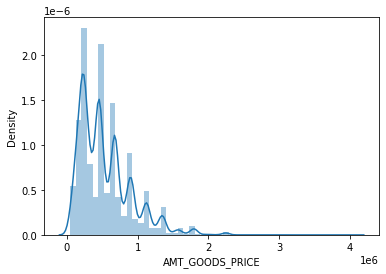

In [16]:
sns.distplot(df["AMT_GOODS_PRICE"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


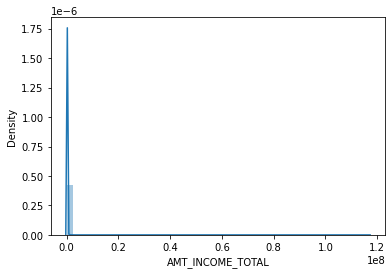

In [17]:
sns.distplot(df["AMT_INCOME_TOTAL"])

In [18]:
df["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(10)

12840    117000000.0
20216      3825000.0
10222      2250000.0
1723       1935000.0
17721      1800000.0
4603       1350000.0
3371       1350000.0
8314       1350000.0
11068      1350000.0
19665      1350000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [19]:
df.iloc[12840].head(20)

SK_ID_CURR                                           114967
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               F
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              1
AMT_INCOME_TOTAL                                117000000.0
AMT_CREDIT                                         562491.0
AMT_ANNUITY                                         26194.5
AMT_GOODS_PRICE                                    454500.0
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                                  Married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              

In [20]:
df = df.drop(df.index[12840])
df["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(10)

20216    3825000.0
10222    2250000.0
1723     1935000.0
17721    1800000.0
11068    1350000.0
19665    1350000.0
8314     1350000.0
4603     1350000.0
3371     1350000.0
19995    1125000.0
Name: AMT_INCOME_TOTAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


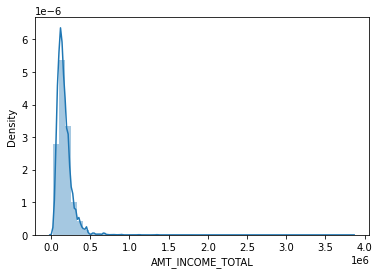

In [21]:
sns.distplot(df["AMT_INCOME_TOTAL"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


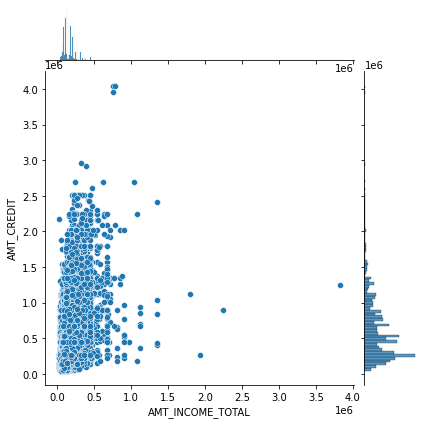

In [22]:
sns.jointplot(df["AMT_INCOME_TOTAL"],df["AMT_CREDIT"])

In [23]:
df["NAME_CONTRACT_TYPE"].head()

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


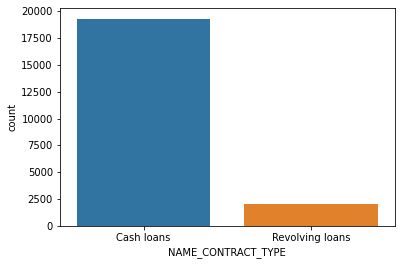

In [24]:
sns.countplot(df["NAME_CONTRACT_TYPE"])

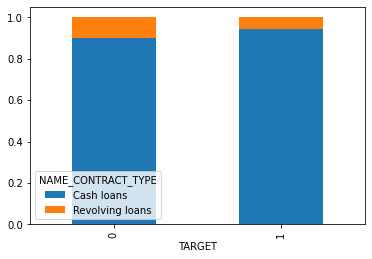

In [25]:
cash_revo = pd.crosstab(df['TARGET'], df['NAME_CONTRACT_TYPE'], normalize='index')
cash_revo.plot.bar(stacked=True)

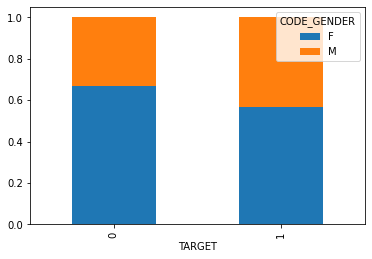

In [26]:
sex = pd.crosstab(df['TARGET'], df['CODE_GENDER'], normalize='index')
sex.plot.bar(stacked=True)

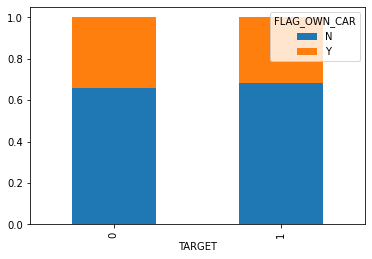

In [27]:
car = pd.crosstab(df['TARGET'], df['FLAG_OWN_CAR'], normalize='index')
car.plot.bar(stacked=True)

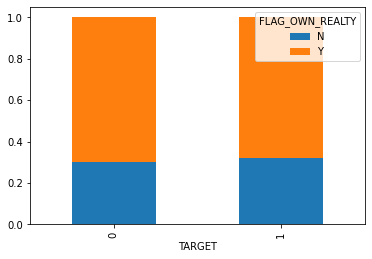

In [28]:
realty = pd.crosstab(df['TARGET'], df['FLAG_OWN_REALTY'], normalize='index')
realty.plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


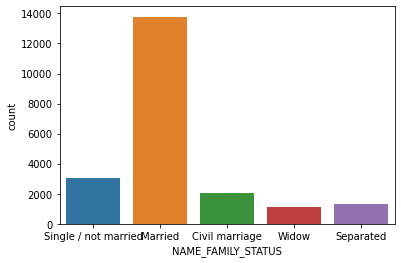

In [29]:
sns.countplot(df["NAME_FAMILY_STATUS"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


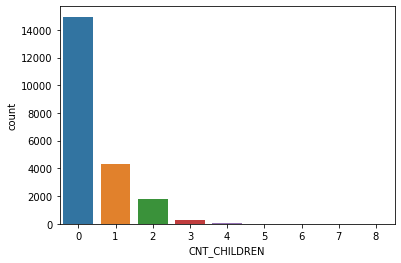

In [30]:
sns.countplot(df["CNT_CHILDREN"])

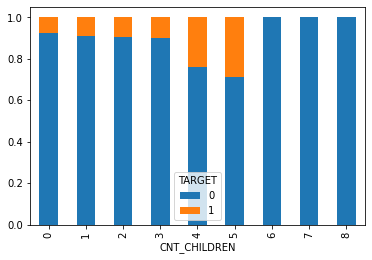

In [31]:
child = pd.crosstab(df['CNT_CHILDREN'], df['TARGET'], normalize='index')
child.plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


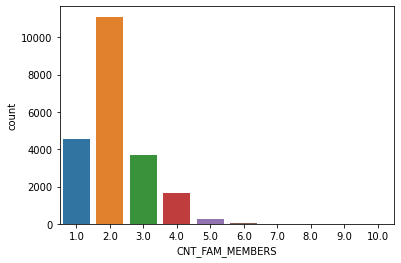

In [32]:
sns.countplot(df["CNT_FAM_MEMBERS"])

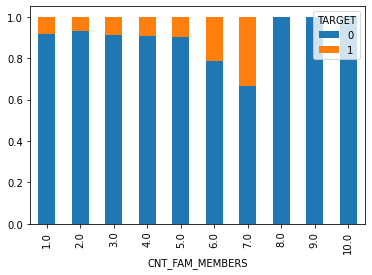

In [33]:
fam = pd.crosstab(df['CNT_FAM_MEMBERS'], df['TARGET'], normalize='index')
fam.plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


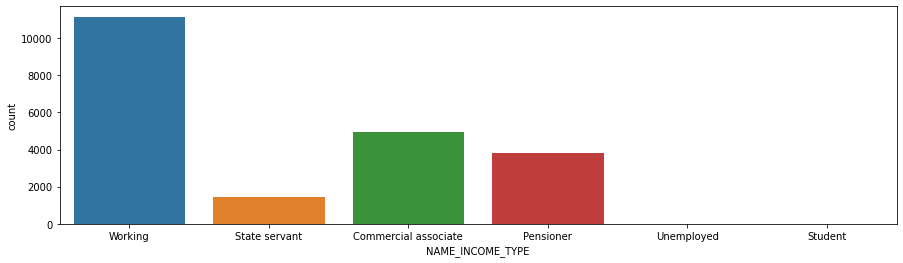

In [34]:
fig,ax = plt.subplots(figsize=(15,4))
sns.countplot(df["NAME_INCOME_TYPE"])

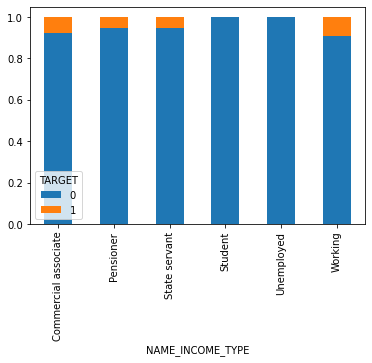

In [36]:
income_tp = pd.crosstab(df['NAME_INCOME_TYPE'], df['TARGET'], normalize='index')
income_tp.plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


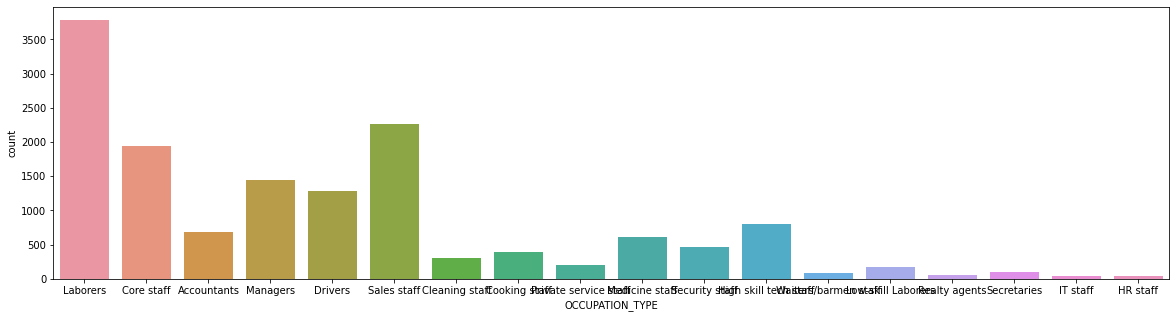

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(df["OCCUPATION_TYPE"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


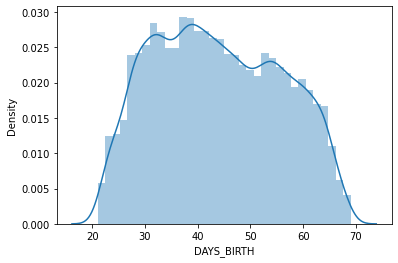

In [38]:
age = df["DAYS_BIRTH"]/-365
sns.distplot(age)

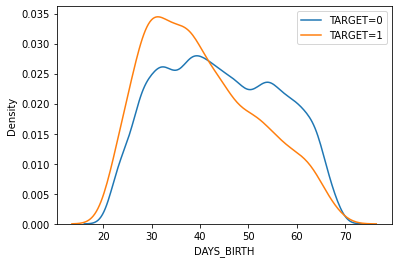

In [39]:
t0 = df.loc[df["TARGET"]==0]
t1 = df.loc[df["TARGET"]==1]

sns.kdeplot(t0["DAYS_BIRTH"]/-365,label="TARGET=0")
sns.kdeplot(t1["DAYS_BIRTH"]/-365,label="TARGET=1")
plt.legend()

In [40]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

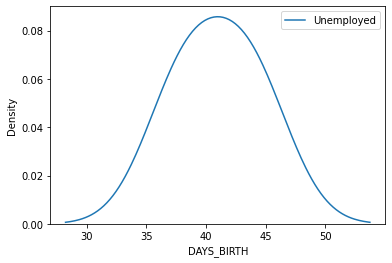

In [42]:
it_un = df.loc[df['NAME_INCOME_TYPE']=="Unemployed"]
it_ml = df.loc[df['NAME_INCOME_TYPE']=='Maternity leave']
sns.kdeplot(it_un["DAYS_BIRTH"]/-365,label="Unemployed")
sns.kdeplot(it_ml["DAYS_BIRTH"]/-365,label='Maternity leave')
plt.legend()